In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import sourses.paths as path
import sourses.class_id as class_id

In [9]:
test_path = path.test_path_43
model_path = path.load_model

batch_size = 32
img_height = 180
img_width = 180

epochs = 10

In [10]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    shuffle=False
)

Found 39209 files belonging to 43 classes.


In [11]:
class_names = test_ds.class_names
for i,j in enumerate(class_names):
    class_names[i] = class_id.class_id[j] 
num_classes = len(class_names)

In [12]:
IMG_SIZE = 180
normalization_layer = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [13]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)
test_ds = test_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [14]:
model = tf.keras.models.load_model(model_path+'model_2.h5')

---
# Welcome to the DEMO

## First shot!!

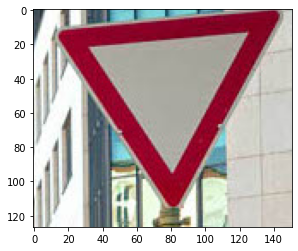

In [15]:
IMAGE_PATH = '../dataset/images-for-recognition/test_yield.jpg'
image = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
plt.imshow(image);

In [16]:
img = np.stack([cv2.resize(image, (180,180))])
pred = model.predict(img, verbose=1)
score = tf.nn.softmax(pred)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 764us/step
This image most likely belongs to Give way to all drivers (yield) with a 100.00 percent confidence.


## Second one!

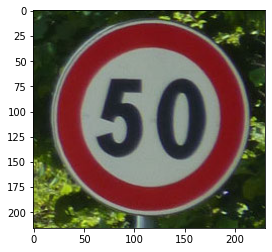

In [17]:
IMAGE_PATH = '../dataset/images-for-recognition/test_limit_50.jpg'
image = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
plt.imshow(image);

In [19]:
img = np.stack([cv2.resize(image, (180,180))])
pred = model.predict(img, verbose=1)
score = tf.nn.softmax(pred)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 794us/step
This image most likely belongs to Limit speed 50 km/h with a 100.00 percent confidence.


## Third shot!!!

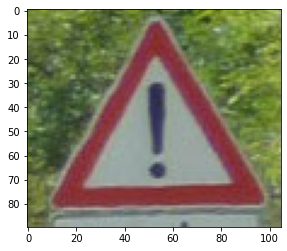

In [20]:
IMAGE_PATH = '../dataset/images-for-recognition/test_warning.jpg'
image = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
plt.imshow(image);

In [22]:
img = np.stack([cv2.resize(image, (180,180))])
pred = model.predict(img, verbose=1)
score = tf.nn.softmax(pred)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 792us/step
This image most likely belongs to Warning for a danger with no specific traffic sign with a 100.00 percent confidence.


## And of course the BONUS!!! There're always BONUS!!

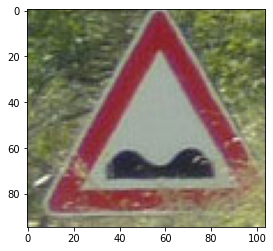

In [23]:
IMAGE_PATH = '../dataset/images-for-recognition/test1.jpg'
image = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
plt.imshow(image);

In [24]:
img = np.stack([cv2.resize(image, (180,180))])
pred = model.predict(img, verbose=1)
score = tf.nn.softmax(pred)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 910us/step
This image most likely belongs to Warning for a bad road surface with a 100.00 percent confidence.
